# Trying out my Metropolis-Hastings algorithm

I wrote a version of the Metropolis-Hastings algorithm and also found it easy to make multidimensional. 
Here I'll try 
importing it and testing it out in a notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt# the usual invocation.
import matplotlib
import corner

In [2]:
from munsell_colors import munch # Munsell color chips dictionary

In [3]:
from mhmcmc import mhmc

In [4]:
Z = np.random.multivariate_normal([0,0], [[1, 0.4], [0.4, 1]], 10000)

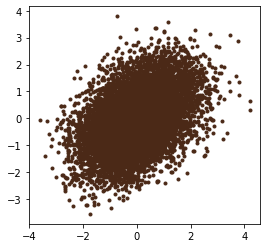

In [5]:
# The proper way to handle aspect ratios:
fig, ax = plt.subplots()
ax.scatter(Z[:,0], Z[:,1], marker='.', color=munch['5YR 2/4'])
ax.set_aspect('equal')

In [6]:
s = np.array([[1, 0.4], [0.4, 1]])

In [7]:
s_inv = np.linalg.inv(s)

In [8]:
s_inv

array([[ 1.19047619, -0.47619048],
       [-0.47619048,  1.19047619]])

In [9]:
def foo(X, dummy):
    "unnormalized log of a 2d gaussian"
    x,y = X
    return -0.5*(1.1905*x**2 - 0.952*x*y + 1.1905*y**2)

In [10]:
foo([0.5,0.2], _)

-0.12502249999999998

In [11]:
c = mhmc(foo, 2, [0.0, 1.0], _, scale=5.0, N=100000)

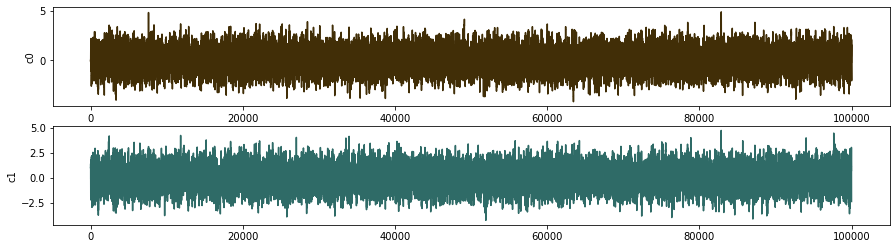

In [12]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(c[0], color=munch['2.5Y 2/4']); ax1.set_ylabel('c0')
ax2.plot(c[1], color=munch['5BG 4/4']); ax2.set_ylabel('c1');


In [13]:
cT = c.T

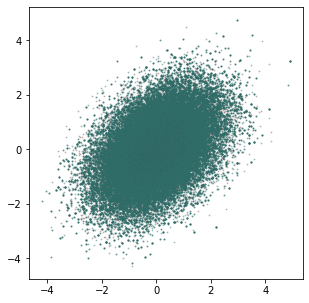

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.scatter(Z[:,0], Z[:,1], marker='.', s=4, color=munch['5R 4/4'], alpha=0.3) #Munsell colors
ax.scatter(cT[1000:,0], cT[1000:,1], marker='.', s=4, color=munch['5BG 4/4'], alpha=.3) 


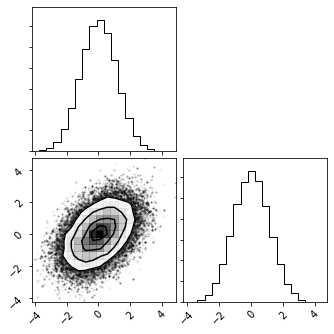

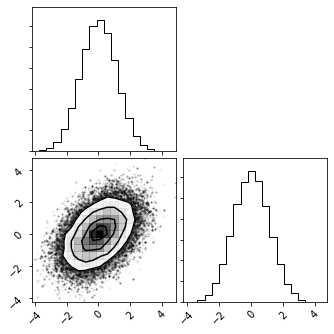

In [16]:
corner.corner(cT)

Now try a nastier 2-D distribution:
$$
f(\mathbf x) = c \exp\left(-(x_1^2 x_2^2 + x_1^2 + x_2^2 - 8 x_1 - 8 x_2) / 2\right)
$$

In [17]:
def fnana(X, dummy):
    x, y = X
    lf = -( (x*y)**2 + x**2 + y**2 - 8*x -8*y )/2
    return lf

In [18]:
cfnana = mhmc(fnana, 2, [1.0, 1.0], _, scale=2.0, N=50000)

In [19]:
cfnanaT = cfnana.T

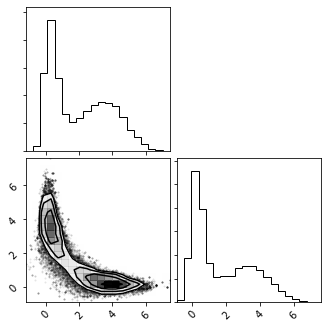

In [21]:
fig = corner.corner(cfnanaT)
fig.savefig('nana-corner.png')